# build a muon dataset to analyze the prera teaseq data

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import muon as mu
import muon.atac as ac
import muon.prot as pt
import seaborn as sns

In [3]:
# define working path
data_path = '/home/jupyter/data/preRA_teaseq/EXP-00243/totalVI/'
fig_path = '/home/jupyter/data/preRA_teaseq/EXP-00243/totalVI/figures/'
output_path = '/home/jupyter/data/preRA_teaseq/EXP-00243/totalVI/output_results/'
# os.mkdir(fig_path)
# os.mkdir(output_path)
# define a project name
proj_name = 'PreRA_TEASeq_'
sc.settings.figdir = fig_path
sc.settings.autosave = False
sc.set_figure_params(vector_friendly=True, dpi_save=300)

In [4]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [5]:
# set fig size
plt.rcParams['figure.figsize'] = [10, 8]

In [6]:
npg_color = ["#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF",
             "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
cluster_colors = ["#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A",
                  "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999",
                  "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00"]
ari_colors = ['#5AAA46', '#F59F00']
cluster_colors_32 = ['#DC050C', '#F9786B', '#3668A8', '#68A0D5', '#844F8D',
                     '#A36295', '#E07D40', '#FD9C35', '#F27075', '#E751A1',
                     '#A7918D', '#57B247', '#9CD192', '#5EA9B4', '#8FCAB6',
                     '#A8771C', '#E3A902', '#7F75A1', '#B2A3CE', '#79767E',
                     '#8A8A8A', '#A38A8A', '#C2A0A0', '#AB58BB', '#9D29CF',
                     '#A3698B', '#8E8E1D', '#88A686', '#1899FF', '#0BC7DF', '#60FF0C', '#FFFF00']

# Processing individual modalities

In [7]:
# load the three modalities data
prera_tea = mu.read(
    data_path + 'PreRA_teaseq_qc_filtered_cells_3modality_rmBR2024.h5mu')

/home/jupyter/libs/muon/lib/python3.10/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [11]:
prera_tea

MuData object with n_obs × n_vars = 88967 × 674626
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcodes', 'adt_qc_flag', 'adt_umis', 'batch_id', 'cell_name', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'rna_cell_uuid', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'cluster ratio', 'subject_id', 'Ethnicity', 'Race', 'Birth Year', 'Sex', 'cohort', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'ADT_snn_res.0.5', 'atac_cell_id', 'n_mito', 'n_fragments', 'peaks_frac', 'altius_frac', 'DoubletScore', 'DoubletEnrichment', 'Clusters', 'iterative_lsi_number_umap_dimension_1', 'iterative_lsi_number_umap_dimension_2', 'nCount_Tiles', 'nFeature_Tiles', 'nCount_cleanadt', 'nFeature_cleanadt', 'cleanadt_snn_res.0.5', 'Tiles_snn_res.0.8', 'SCT.weight', 'ADT.weight', 'Tiles.weight', 'wsnn_res.0.5', 'wsnn_res.0.8', 'l1_cell_types', 'l2_cell_types', 'clean_l2_cell_types', 'nCount_rna', 'nFeature_rna', 'immunehealth_l1', 'immunehealth_l1_conf_score', 'immunehealth_l2', 'immunehealth_l2_conf_score', 'immunehealth_l3', 'immunehealth_l3_conf_score', 'leiden_wnn_0_5', 'manual_labels'
  uns:	'clean_l2_cell_types_colors', 'immunehealth_l2_colors', 'immunehealth_l3_colors', 'l2_cell_types_colors', 'leiden', 'manual_labels_colors', 'umap', 'wnn'
  obsm:	'X_umap'
  obsp:	'wnn_connectivities', 'wnn_distances'
  3 modalities
    rna:	88967 x 36601
      obs:	'log10umi', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'conf_score', 'majority_voting', 'over_clustering'
      var:	'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Archr_naive_wilcoxon', 'clean_l2_cell_types_colors', 'cohort_colors', 'dendrogram_leiden', 'hvg', 'immunehealth_l1_colors', 'immunehealth_l2_colors', 'immunehealth_l3_colors', 'leiden', 'leiden_colors', 'leiden_wilcoxon', 'leiden_wilcoxon_C10vsC0', 'log1p', 'neighbors', 'pca', 'rna:leiden_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    prot:	88967 x 166
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'clean_l2_cell_types_colors', 'hvg', 'immunehealth_l1_colors', 'immunehealth_l2_colors', 'immunehealth_l3_colors', 'l2_cell_types_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'dsb'
      obsp:	'connectivities', 'distances'
    atac:	88967 x 637859
      obs:	'altius_count', 'altius_frac', 'barcodes', 'batch_id', 'BlacklistRatio', 'cell_name', 'chip_id', 'DoubletEnrichment', 'DoubletScore', 'gene_bodies_count', 'gene_bodies_frac', 'Gex_MitoRatio', 'Gex_nGenes', 'Gex_nUMI', 'Gex_RiboRatio', 'n_duplicate', 'n_fragments', 'n_mito', 'n_unique', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'original_barcodes', 'PassQC', 'pbmc_sample_id', 'peaks_count', 'peaks_frac', 'pool_id', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'singlet', 'tss_count', 'tss_frac', 'TSSEnrichment', 'well_id', 'Clusters', 'subject_id', 'cohort', 'Birth.Year', 'Sex', 'wsnn_res.0.5', 'l1_cell_types', 'l2_cell_types', 'clean_l2_cell_types', 'ReadsInPeaks', 'FRIP', 'MochaPeak_clusters_1', 'n_genes_by_counts', 'total_counts', 'leiden'
      var:	'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'X_name', 'leiden', 'neighbors', 'umap'
      obsm:	'X_LSI', 'X_umap'
      obsp:	'connectivities', 'distances'

### protein

In [ ]:
# get protein information from ADT slot
prot = prera_tea.mod["prot"]

In [ ]:
(prot.X == prot.layers['dsb']).all()

In [ ]:
sc.pp.highly_variable_genes(prot)

In [ ]:
isotypes = prot.var_names.values[["Isotype" in v for v in prot.var_names]]
print(isotypes)

In [ ]:
# set highly variable protein to all and remove isotype
prot.var['highly_variable'] = True
prot.var.loc[isotypes, 'highly_variable'] = False

In [ ]:
# # run pca, clustering umap in protein
sc.tl.pca(prot)
sc.pl.pca_variance_ratio(rna, log=True)

In [ ]:
sc.pp.neighbors(prot)
sc.tl.umap(prot, random_state=1)

In [ ]:
sc.pl.umap(prot, color=['CD3', 'CD19', 'HLA_DR', 'CD56', 'CD14'])

In [ ]:
mu.pl.embedding(prera_tea, basis="prot:X_umap",
                color='clean_l2_cell_types', legend_loc='on data')

In [ ]:
prera_tea.update()

### RNA

In [ ]:
rna = prera_tea.mod['rna']
rna

In [ ]:
rna.X = rna.layers['counts'].copy()

In [ ]:
# annotate the group of mitochondrial genes as 'mt'
rna.var['mt'] = rna.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(
    rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.normalize_total(rna, target_sum=1e4)

In [ ]:
sc.pp.log1p(rna)

In [ ]:
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

In [ ]:
prera_tea.update()

In [ ]:
sc.pl.highly_variable_genes(rna)
np.sum(rna.var.highly_variable)

In [ ]:
# Scaling in RNA
rna.raw = rna
sc.pp.scale(rna, max_value=10)

In [ ]:
sc.tl.pca(rna, svd_solver='arpack')

In [ ]:
sc.pl.pca(rna, color=['CD3G', 'CD19', 'HLA-DRA',  'CD14'])

In [ ]:
sc.pl.pca_variance_ratio(rna, log=True)

In [ ]:
sc.pp.neighbors(rna, n_pcs=10)

In [ ]:
sc.tl.umap(rna)

In [ ]:
sc.tl.leiden(rna, resolution=.75)

In [ ]:
sc.pl.umap(rna, color=["leiden"], legend_loc="on data")

In [ ]:
# check cluster 10
sc.tl.rank_genes_groups(rna, groupby='leiden', groups=['10'], reference='0',
                        method='wilcoxon', key_added='leiden_wilcoxon_C10vsC0')

In [ ]:
# plot top degs
sc.tl.dendrogram(rna, groupby=cluster_name)
sc.pl.rank_genes_groups_dotplot(
    rna, groupby=cluster_name, standard_scale="var",
    n_genes=10, key='leiden_wilcoxon_C10vsC0',
    save='_' + proj_name + cluster_name+'_wilcoxon_top_genes_dotplot_scale.png'
)

In [ ]:
# output the deg list
cluster_name = 'leiden'
leiden_deg = sc.get.rank_genes_groups_df(rna, key='leiden_wilcoxon_C10vsC0',
                                         pval_cutoff=None,  group=None).rename(
    {'group': cluster_name},  axis='columns')
leiden_deg['direction'] = np.where(
    leiden_deg['logfoldchanges'] > 0, 'up', 'down')
leiden_deg = leiden_deg.reindex(
    leiden_deg['scores'].abs().sort_values(ascending=False).index)
# leiden_deg.to_csv(output_path + proj_name + cluster_name+'_wilcoxon_degs.csv')
# check cluster 10 degs
c10_deg = leiden_deg.loc[(leiden_deg[cluster_name] == '10') &
                         (leiden_deg['pvals_adj'] < 0.01)]
c10_deg

In [ ]:

sc.pl.dotplot(rna, c10_deg['names'][0:29].to_list(), groupby=cluster_name, standard_scale='var',
              dendrogram=True, swap_axes=False,
              save='_' + proj_name + cluster_name + '_c10_dotplot_scale.png')

In [ ]:
prera_tea.update()

In [ ]:
p1 = mu.pl.embedding(prera_tea, basis="prot:X_umap",
                     color='clean_l2_cell_types', legend_loc="on data")
p2 = mu.pl.embedding(prera_tea, basis="rna:X_umap",
                     color='clean_l2_cell_types', legend_loc="on data")

In [ ]:
p1 = mu.pl.embedding(prera_tea, basis="prot:X_umap",
                     color='clean_l2_cell_types', legend_loc="on data")

In [ ]:
mu.pl.embedding(prera_tea, basis="prot:X_umap", color=['prot:CD185', 'rna:CXCR5'],
                legend_loc="on data", vmin='p1',  vmax='p99')

In [ ]:
mu.pl.embedding(prera_tea, basis="prot:X_umap", color=[
                'clean_l2_cell_types', 'prot:CD185'], legend_loc="on data")

### ATAC

In [ ]:
atac = prera_tea.mod['atac']
atac

In [ ]:
atac.X[1:50, 1:50].toarray()

In [ ]:
# import lsi coordinate from atac
archr_lsi = pd.read_csv('/home/jupyter/data/preRA_teaseq/output_results/atac/preRA_teaseq_rbBR2024_lsi_matrix.tsv',
                        sep='\t',
                        index_col='barcodes')
# reorder to match the index
archr_lsi = archr_lsi.reindex(prera_tea.obs.index)
archr_lsi.head()

In [ ]:
# add archr umap to anndata
atac.obsm['X_LSI'] = archr_lsi.to_numpy()

In [ ]:
prera_tea.update()

In [ ]:
atac.X[1:1000, 1:1000].toarray()

In [ ]:
plt.hist(atac.X[1:1000, 1:1000].toarray(), bins='auto')

In [ ]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.neighbors(atac, use_rep='X_LSI')
sc.tl.umap(atac)

In [ ]:
# run cluters and umap
sc.tl.leiden(atac, resolution=0.8)

In [ ]:
prera_tea.update()

## run 3wnn

In [ ]:
prera_tea

In [ ]:
mu.pp.neighbors(prera_tea, key_added='wnn')

In [ ]:
mu.tl.umap(prera_tea, neighbors_key='wnn', random_state=10)

In [ ]:
sc.tl.leiden(prera_tea, resolution=0.5, neighbors_key='wnn',
             key_added='leiden_wnn_0_5')

In [ ]:
mu.pl.umap(prera_tea, color=['rna:mod_weight',
           'prot:mod_weight', 'atac:mod_weight'], cmap='RdBu')

In [ ]:
mu.pl.umap(prera_tea, color=['l2_cell_types'], legend_loc="on data")

In [ ]:
prera_tea.update()

In [ ]:
prera_tea.write(
    data_path + 'PreRA_teaseq_qc_filtered_cells_3modality_rmBR2024.h5mu')

## label teaseq with AIFI labels

In [ ]:
import celltypist
from celltypist import models

In [ ]:
# load the immune healthy trained cell typiest model
models.models_path = '/home/jupyter/data/Reference/celltypist/AIFI_CertPro/AIFI_Model_Celltypist_CertPro'
# load all 3 levels of labels
model_l1 = models.Model.load(
    model='ref_pbmc_clean_celltypist_model_AIFI_L1_2024-04-18.pkl')
model_l2 = models.Model.load(
    model='ref_pbmc_clean_celltypist_model_AIFI_L2_2024-04-19.pkl')
model_l3 = models.Model.load(
    model='ref_pbmc_clean_celltypist_model_AIFI_L3_2024-04-19.pkl')

In [ ]:
rna = prera_tea['rna']
rna

In [ ]:
rna.X

In [ ]:
# do prediction for all 3 levels
predictions_l1 = celltypist.annotate(
    rna, model='ref_pbmc_clean_celltypist_model_AIFI_L1_2024-04-18.pkl', majority_voting=True)
# get prediction labels and scores for all 3 levels
pred_adata_l1 = predictions_l1.to_adata()

# transfer the prediction label to the anndata
prera_tea.obs["immunehealth_l1"] = pred_adata_l1.obs.loc[
    rna.obs.index, "predicted_labels"
]
prera_tea.obs["immunehealth_l1_conf_score"] = pred_adata_l1.obs.loc[
    rna.obs.index, "conf_score"
]

In [ ]:
# do prediction for all 3 levels
predictions_l2 = celltypist.annotate(rna, model='ref_pbmc_clean_celltypist_model_AIFI_L2_2024-04-19.pkl',
                                     majority_voting=True)
# get prediction labels and scores for all 3 levels
pred_adata_l2 = predictions_l2.to_adata()

# transfer the prediction label to the anndata
prera_tea.obs["immunehealth_l2"] = pred_adata_l2.obs.loc[
    rna.obs.index, "predicted_labels"
]
prera_tea.obs["immunehealth_l2_conf_score"] = pred_adata_l2.obs.loc[
    rna.obs.index, "conf_score"
]

In [ ]:
# do prediction for all 3 levels
predictions_l3 = celltypist.annotate(rna, model='ref_pbmc_clean_celltypist_model_AIFI_L3_2024-04-19.pkl',
                                     majority_voting=True)

# get prediction labels and scores for all 3 levels
pred_adata_l3 = predictions_l3.to_adata()

# transfer the prediction label to the anndata
prera_tea.obs["immunehealth_l3"] = pred_adata_l3.obs.loc[
    rna.obs.index, "predicted_labels"
]
prera_tea.obs["immunehealth_l3_conf_score"] = pred_adata_l3.obs.loc[
    rna.obs.index, "conf_score"
]

In [ ]:
prera_tea.update()

In [ ]:
prera_tea

In [ ]:
mu.pl.embedding(prera_tea, basis="rna:X_umap", ncols=2,
                color=['immunehealth_l1', 'immunehealth_l2',
                       'immunehealth_l3', 'clean_l2_cell_types'],
                legend_loc='on data')

In [ ]:
mu.pl.embedding(prera_tea, basis="prot:X_umap", ncols=2,
                color=['immunehealth_l1', 'immunehealth_l2',
                       'immunehealth_l3', 'clean_l2_cell_types'],
                legend_loc='on data')

In [ ]:
prera_tea.obs['l2_cell_types'].unique()
# create a new column for the manual labels

In [ ]:
mu.pl.umap(prera_tea, color=['l2_cell_types'], legend_loc="on data")

In [ ]:
prera_tea.obs['immunehealth_l2'].value_counts()

In [ ]:
mu.pl.embedding(prera_tea, basis="rna:X_umap",
                color=['immunehealth_l2', 'clean_l2_cell_types', 'rna:leiden'],
                legend_fontsize=4, legend_loc='on data',
                save=proj_name + 'rna_umap_aifi_l2_label.png')

In [ ]:
mu.pl.embedding(prera_tea, basis="rna:X_umap", color=['immunehealth_l3'],
                legend_loc='on data', legend_fontsize=4,
                save=proj_name + 'rna_umap_aifi_l3_label.png')

In [ ]:
# set fig size
plt.rcParams['figure.figsize'] = [4, 4]

mu.pl.embedding(prera_tea, basis="rna:X_umap", color=['immunehealth_l2'],
                title='Cell Types',
                legend_fontsize=6, legend_loc='on data',
                save=proj_name + 'rna_umap_immunehealth_l2_cell_types.pdf')

In [ ]:
mu.pl.embedding(prera_tea, basis="prot:X_umap", color=['l2_cell_types'],
                title='Adt_Umap_clean_l2',
                legend_fontsize=4, legend_loc='on data',
                save=proj_name + 'adt_umap_clean_l2_cell_types.pdf')

In [ ]:
mu.pl.embedding(prera_tea, basis="rna:X_umap", color=['clean_l2_cell_types'],
                title='RNA_Umap_clean_l2',
                legend_fontsize=4, legend_loc='on data',
                save=proj_name + 'rna_umap_clean_l2_cell_types.png')

In [ ]:
# mu.pl.embedding(prera_tea, basis="atac:X_umap", color= ['clean_l2_cell_types'],
#                 title='ATAC_Umap_clean_l2',
#                 legend_fontsize=4,legend_loc='on data',
#                 save=proj_name + 'atac_umap_clean_l2_cell_types.png')

In [ ]:
prera_tea.write(
    data_path+'PreRA_teaseq_qc_filtered_cells_3modality_rmBR2024.h5mu')

In [ ]:
# save the immune health predicted labels
tea_aifi_labels = prera_tea.obs[['immunehealth_l1',
                                 'immunehealth_l1_conf_score', 'immunehealth_l2',
                                 'immunehealth_l2_conf_score',	'immunehealth_l3',	'immunehealth_l3_conf_score']]
tea_aifi_labels.to_csv(output_path + proj_name + 'aifi_labels.csv')

In [ ]:
output_path + proj_name + 'aifi_labels.csv'

In [ ]:
# check l3 prediction
cmtx = sc.metrics.confusion_matrix(
    "immunehealth_l2", "clean_l2_cell_types", prera_tea.obs)
# Now if we normalize it by column:
cmtx_norm_col = (cmtx-cmtx.mean())/cmtx.std()
sns.heatmap(cmtx_norm_col, xticklabels=True, yticklabels=True)

In [ ]:
# Normalize it by row:
cmtx_norm_row = cmtx.apply(lambda x: (x-x.mean())/x.std(), axis=1)
sns.heatmap(cmtx_norm_row, xticklabels=True, yticklabels=True)

In [ ]:
prera_tea.obs.loc[prera_tea.obs['immunehealth_l3'].astype('str').str.contains('mono'),
                  'immunehealth_l3'].unique()

In [ ]:
prera_tea.obs.loc[prera_tea.obs['immunehealth_l3'] == 'IL1B+ CD14 monocyte']

### clean up the l2 cell type labels in teaseq

In [ ]:
prera_tea.obs['l2_cell_types'].unique().tolist()

In [ ]:
# clean up the labels
prera_tea.obs['manual_labels'] = prera_tea.obs['l2_cell_types'].copy().astype(
    'str')
prera_tea.obs.loc[prera_tea.obs['manual_labels'].isin(
    ['CD14mono_subA', 'CD14mono_subB', 'CD14mono_other']), 'manual_labels'] = 'CD14 mono'
prera_tea.obs.loc[prera_tea.obs['manual_labels']
                  == 'CD16mono', 'manual_labels'] = 'CD16 mono'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'nk_proliferating', 'manual_labels'] = 'Proliferating NK'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'nk_cd56dim', 'manual_labels'] = 'CD56dim NK'
prera_tea.obs.loc[prera_tea.obs['manual_labels']
                  == 'nk_cd56hi', 'manual_labels'] = 'CD56hi NK'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  't_proliferating', 'manual_labels'] = 'Proliferating T'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'myeloid_other', 'manual_labels'] = 'Other myeloid'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'int_mono', 'manual_labels'] = 'Intermediate mono'
prera_tea.obs.loc[prera_tea.obs['manual_labels']
                  == 'B cells C9', 'manual_labels'] = 'Other B'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'CD4 TEMRA-like', 'manual_labels'] = 'CD4 CTL'
prera_tea.obs.loc[prera_tea.obs['manual_labels']
                  == 'nk_t', 'manual_labels'] = 'NKT'
prera_tea.obs.loc[prera_tea.obs['manual_labels'] ==
                  'Poor Performers', 'manual_labels'] = 'Other'
prera_tea.obs['manual_labels'] = prera_tea.obs['manual_labels'].astype(
    'category')

In [ ]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    mu.pl.umap(prera_tea, color=['manual_labels'], palette=cluster_colors_32,  # legend_loc="on data", legend_fontsize='small',
               save=proj_name + '_manual_labels_legend.pdf',
               show=True)
# p1.set_xlabel("WNN UMAP1")
# p1.set_ylabel("WNN UMAP2")
# p1.set_title('Cell types')
# plt.tight_layout()
# p1.figure.savefig(fig_path+proj_name + '_manual_labels.pdf')

### plot S7A

In [ ]:
from adjustText import adjust_text
import matplotlib.patheffects as pe


def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None, color_by_group=False
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    # Fill the text colors dictionary
    text_colors = {group: None for group in adata.obs[groupby].cat.categories}

    if color_by_group and groupby + "_colors" in adata.uns:
        for i, group in enumerate(adata.obs[groupby].cat.categories):
            if group in exclude:
                continue
            text_colors[group] = adata.uns[groupby + "_colors"][i]

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, color=text_colors[k], **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, color=text_colors[k], **text_kwargs)
                 for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

In [ ]:
cell_type_key = 'manual_labels'
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": 500, "figure.frameon": True}):
    ax = mu.pl.umap(prera_tea, color=cell_type_key, show=False, palette=cluster_colors_32,
                    legend_loc=None, frameon=False)
    gen_mpl_labels(
        prera_tea,
        cell_type_key,
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=12  # , path_effects=[pe.withStroke(linewidth=1, foreground="darkgray")]
                         ),
        color_by_group=False
    )
    ax.set_xlabel("WNN UMAP1")
    ax.set_ylabel("WNN UMAP2")
    ax.set_title('Cell types')
    fig = ax.get_figure()
    fig.tight_layout()
    plt.show()
    fig.savefig(fig_path+proj_name + '_3wnn_umap_manual_labels_repel.pdf')

In [ ]:
prera_tea.write(
    data_path + 'PreRA_teaseq_qc_filtered_cells_3modality_rmBR2024.h5mu')

In [ ]:
prera_tea

# susbet the dataset cd4 t cells

In [ ]:
prera_tea.obs.loc[prera_tea.obs.clean_l2_cell_types.str.contains(
    'cd4|treg'), 'clean_l2_cell_types'].unique()

In [ ]:
prera_tea.obs.loc[prera_tea.obs.clean_l2_cell_types.str.contains(
    'cd4|treg'), 'clean_l2_cell_types'].shape

In [ ]:
# load the metadata of cd4 t cells from h5seurat
seurat_meta = pd.read_csv(
    '/home/jupyter/data/preRA_teaseq/output_results/cd4_t/PreRA_teaseq_seurat_cd4_t_filtered_cells_rmBR2024_h5Seurat_metadata.csv')
seurat_meta.shape

In [ ]:
seurat_meta['barcodes'].isin(prera_tea.obs.index).value_counts()

In [ ]:
# subset the cd4
cd4_muon = prera_tea[prera_tea.obs.index.isin(seurat_meta['barcodes'])].copy()

In [ ]:
cd4_muon

In [ ]:
cd4_muon.write(data_path+'PreRA_teaseq_cd4_3modality.h5mu')

# susbet the naive T cells

In [25]:
prera_tea.obs.loc[prera_tea.obs.clean_l2_cell_types.str.contains(
    'naive'), 'clean_l2_cell_types'].unique()

['cd4_naive', 'cd8_naive', 'naive_b_cells']
Categories (35, object): ['activated_switched_memory_b_cells', 'b_cells_c9', 'cd4_ctl', 'cd4_memory', ..., 'switched_memory_b_cells', 't_proliferating', 'transitional_b_cells', 'treg']

In [ ]:
prera_tea.obs.loc[prera_tea.obs.clean_l2_cell_types.str.contains(
    'cd4|treg'), 'clean_l2_cell_types'].shape

In [ ]:
# load the metadata of cd4 t cells from h5seurat
seurat_meta = pd.read_csv(
    '/home/jupyter/data/preRA_teaseq/output_results/cd4_t/PreRA_teaseq_seurat_cd4_t_filtered_cells_rmBR2024_h5Seurat_metadata.csv')
seurat_meta.shape

In [ ]:
seurat_meta['barcodes'].isin(prera_tea.obs.index).value_counts()

In [ ]:
# subset the cd4
cd4_muon = prera_tea[prera_tea.obs.index.isin(seurat_meta['barcodes'])].copy()

In [ ]:
cd4_muon

In [ ]:
cd4_muon.write(data_path+'PreRA_teaseq_cd4_3modality.h5mu')

# test the multivi model

In [ ]:
prera_tea.write(data_path+'PreRA_teaseq_qc_filtered_cells_3modality.h5mu')

In [ ]:
# ceate a new anndata dataset to have the format need for multivi

In [ ]:
prera_tea_rna = prera_tea.mod['RNA'].copy()

In [ ]:
prera_tea_rna

In [ ]:
prera_tea.var[prera_tea.var.index.contains('ADT')]

In [ ]:
prera_tea.var.index

# plot B cells genes

In [12]:
prera_tea.obs['clean_l2_cell_types'].unique().tolist()

['cd4_naive',
 'cd8_memory',
 'treg',
 'cd8_naive',
 'cd4_memory',
 'nk_cd56dim',
 'naive_b_cells',
 'cd14mono_sub_b',
 't_proliferating',
 'switched_memory_b_cells',
 'myeloid_other',
 'transitional_b_cells',
 'cd4_ctl',
 'int_mono',
 'poor_performers',
 'cd8_temra',
 'nk_proliferating',
 'cd14mono_sub_a',
 'cd16mono',
 'dn_t',
 'nk_cd56hi',
 'non_switched_memory_b_cells',
 'mait',
 'dcs',
 'non_switched_effector_b_cells',
 'plasma_cells',
 'nk_like_t_nk',
 'cd8_trm',
 'b_cells_c9',
 'nk_t',
 'gd_t',
 'cd14mono_other',
 'hspcs',
 'activated_switched_memory_b_cells',
 'cd4_temra_like']

In [13]:
bna_tea = prera_tea[prera_tea.obs['clean_l2_cell_types'] == 'naive_b_cells']

In [14]:
bna_tea

View of MuData object with n_obs × n_vars = 5755 × 674626
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcodes', 'adt_qc_flag', 'adt_umis', 'batch_id', 'cell_name', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'rna_cell_uuid', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'cluster ratio', 'subject_id', 'Ethnicity', 'Race', 'Birth Year', 'Sex', 'cohort', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'ADT_snn_res.0.5', 'atac_cell_id', 'n_mito', 'n_fragments', 'peaks_frac', 'altius_frac', 'DoubletScore', 'DoubletEnrichment', 'Clusters', 'iterative_lsi_number_umap_dimension_1', 'iterative_lsi_number_umap_dimension_2', 'nCount_Tiles', 'nFeature_Tiles', 'nCount_cleanadt', 'nFeature_cleanadt', 'cleanadt_snn_res.0.5', 'Tiles_snn_res.0.8', 'SCT.weight', 'ADT.weight', 'Tiles.weight', 'wsnn_res.0.5', 'wsnn_res.0.8', 'l1_cell_types', 'l2_cell_types', 'clean_l2_cell_types', 'nCount_rna', 'nFeature_rna', 'immunehealth_l1', 'immunehealth_l1_conf_score', 'immunehealth_l2', 'immunehealth_l2_conf_score', 'immunehealth_l3', 'immunehealth_l3_conf_score', 'leiden_wnn_0_5', 'manual_labels'
  obsm:	'X_umap'
  obsp:	'wnn_connectivities', 'wnn_distances'
  3 modalities
    rna:	5755 x 36601
      obs:	'log10umi', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'conf_score', 'majority_voting', 'over_clustering'
      var:	'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Archr_naive_wilcoxon', 'clean_l2_cell_types_colors', 'cohort_colors', 'dendrogram_leiden', 'hvg', 'immunehealth_l1_colors', 'immunehealth_l2_colors', 'immunehealth_l3_colors', 'leiden', 'leiden_colors', 'leiden_wilcoxon', 'leiden_wilcoxon_C10vsC0', 'log1p', 'neighbors', 'pca', 'rna:leiden_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    prot:	5755 x 166
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'clean_l2_cell_types_colors', 'hvg', 'immunehealth_l1_colors', 'immunehealth_l2_colors', 'immunehealth_l3_colors', 'l2_cell_types_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'dsb'
      obsp:	'connectivities', 'distances'
    atac:	5755 x 637859
      obs:	'altius_count', 'altius_frac', 'barcodes', 'batch_id', 'BlacklistRatio', 'cell_name', 'chip_id', 'DoubletEnrichment', 'DoubletScore', 'gene_bodies_count', 'gene_bodies_frac', 'Gex_MitoRatio', 'Gex_nGenes', 'Gex_nUMI', 'Gex_RiboRatio', 'n_duplicate', 'n_fragments', 'n_mito', 'n_unique', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'original_barcodes', 'PassQC', 'pbmc_sample_id', 'peaks_count', 'peaks_frac', 'pool_id', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'singlet', 'tss_count', 'tss_frac', 'TSSEnrichment', 'well_id', 'Clusters', 'subject_id', 'cohort', 'Birth.Year', 'Sex', 'wsnn_res.0.5', 'l1_cell_types', 'l2_cell_types', 'clean_l2_cell_types', 'ReadsInPeaks', 'FRIP', 'MochaPeak_clusters_1', 'n_genes_by_counts', 'total_counts', 'leiden'
      var:	'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'X_name', 'leiden', 'neighbors', 'umap'
      obsm:	'X_LSI', 'X_umap'
      obsp:	'connectivities', 'distances'

In [15]:
bna_tea['rna'].obs['cohort'] = bna_tea.obs['cohort']
bna_tea['rna'].obs['status'] = bna_tea['rna'].obs['cohort'].replace(
    {'Healthy': 'Control2', 'pre-RA': 'ARI'})

/tmp/ipykernel_1196/3244828500.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bna_tea['rna'].obs['cohort']=bna_tea.obs['cohort']
/tmp/ipykernel_1196/3244828500.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bna_tea['rna'].obs['status'] = bna_tea['rna'].obs['cohort'].replace({'Healthy': 'Control2', 'pre-RA': 'ARI'})


In [16]:
bna_tea['rna'].obs['cohort'].replace({'Healthy': 'Control2', 'pre-RA': 'ARI'})

/tmp/ipykernel_1196/3263936273.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bna_tea['rna'].obs['cohort'].replace({'Healthy': 'Control2', 'pre-RA': 'ARI'})


bd6c2cd2867611ec8396aea599a86ab5         ARI
bebfd250867611ec8396aea599a86ab5         ARI
becfd45c867611ec8396aea599a86ab5         ARI
bf0e7be4867611ec8396aea599a86ab5         ARI
bfae8d28867611ec8396aea599a86ab5         ARI
                                      ...   
660ca306867911ecb648ee55e4236e76    Control2
6620fcde867911ecb648ee55e4236e76    Control2
66e2b82e867911ecb648ee55e4236e76    Control2
671b95cc867911ecb648ee55e4236e76    Control2
67891f98867911ecb648ee55e4236e76    Control2
Name: cohort, Length: 5755, dtype: category
Categories (2, object): ['Control2', 'ARI']

/home/jupyter/libs/muon/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/jupyter/libs/muon/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter/libs/muon/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter/libs/muon/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning

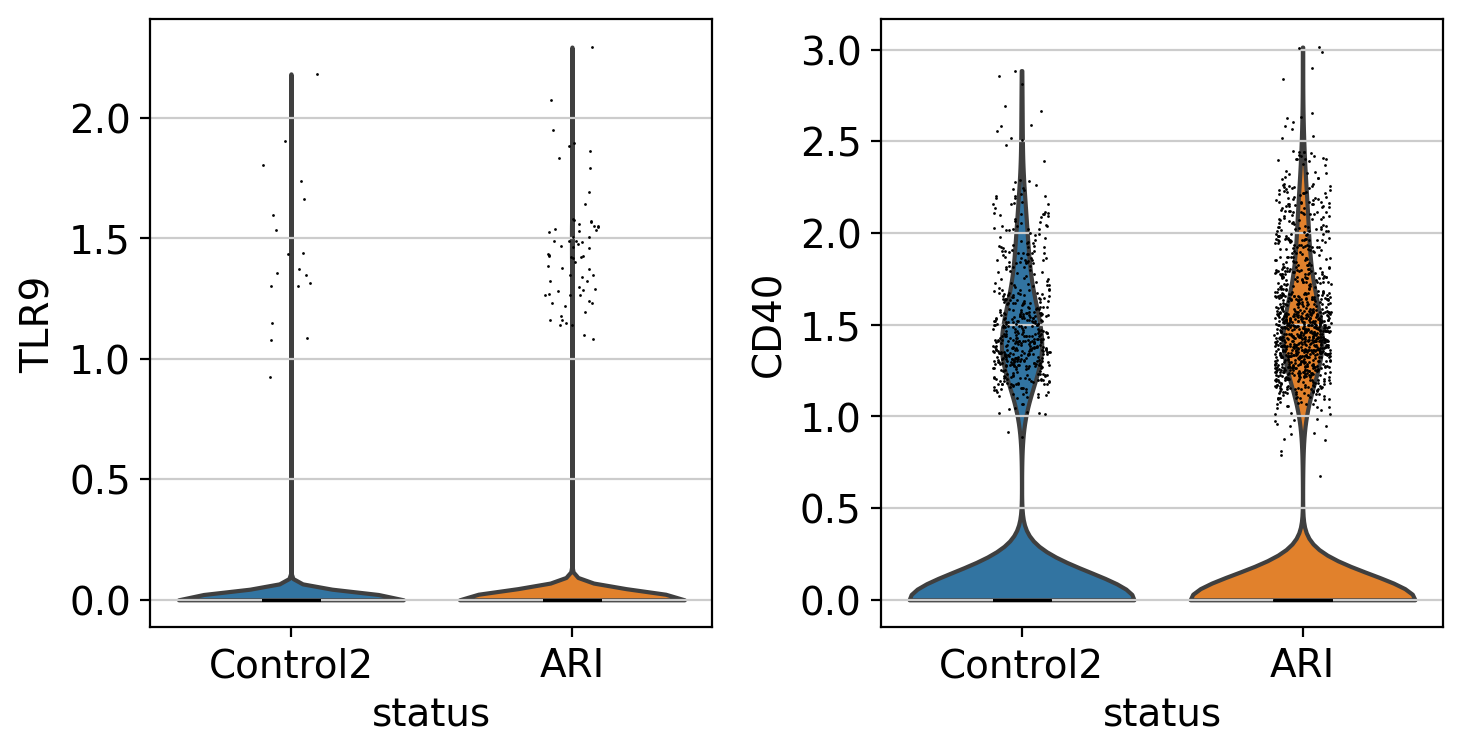

In [24]:
sc.pl.violin(bna_tea['rna'], keys=['TLR9', 'CD40'], groupby='status', save=proj_name+'Bnaive_TLR9_violin.pdf'
             )